## Assignment 5

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

**What is gradient descent?**

= To find the lowest point (also known as the local minimum) of the function. As a "first-order optimization algorithm", gradient descent makes use of the function's first derivative.

*So, what is the gradient of a function?* A function's gradient is a vector that shows the "direction and magnitude" of the function's change at a specific point.

The gradient descent algorithm operates as follows: 

> Start with-choose an initial point for the minimum (x0) --> a. calculate the gradient of function --> b. Move in the opposite direction of the function's gradient --> repeat the a-b steps until stopping requirement is satisfied (kmax) 

*can be slow, depending on starting point and step size selected
popular method to handle = using several random starting points*

ref-for more: class notes [004]; https://www.analyticsvidhya.com/blog/2020/10/how-does-the-gradient-descent-algorithm-work-in-machine-learning/

### Part 1

task: implement "gradient descent" which looks for the minimum of the function with a known derivative

unpacking a tuble in python: process of assigning individual variables to elements of an iterable (such as a list or tuple) is called unpacking in Python.

fruits = ("apple", "banana", "cherry") #packing a tuple 

(green, yellow, red) = fruits #unpacking a tuple

print(green)
result: apple

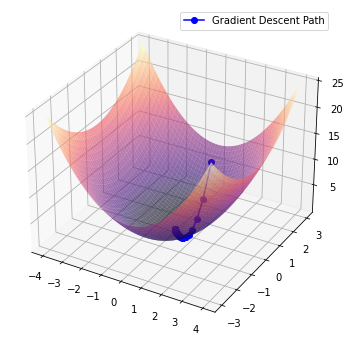

(array([ 5.70899077e-05, -4.28174308e-05]), 5.09258994083622e-09, 50)

In [2]:
# Defining f as pointer to the function which will be optimized and g as pointer to the gradient of function 
# Those then will be passed as arguments to the gradient_descent function
def f(point): # defining f function as f(point) 
    # point -> 2 dimensional input and tuple or list containing x and y
    x, y = point # unpacking x and y from point
    return x**2 + y**2 # squaring x and y then sum those and returning them [f(x, y) = x^2 + y^2]
    # goal is to find (x,y) point that the function reaches its minimum value 

def g(point): # defining g function as g(point) 
    x, y = point # unpacking x and y from point
    return np.array([2*x, 2*y]) # partial derivative of the function f(x, y) = x^2 + y^2 --> 2x and 2y -->  gradient is a vector = [2x, 2y] 
    # g function returns f function's gradient at the point (x, y)
    # returns it as Numpy array with 2 values 
    
    # Above code is for: [This means that the gradient function will return two values (one for d/dx and one for d/dy)]

# Defining the gradient descent function as indicated in assignment
# xoptimal, foptimal, niterations = gradient_descent(f, g, xstart, lambda,tolerance, maxiterations, doplot=True)
# f= point to the function; g= pointer to the gradient of function; xstart= starting point; lambda= step size; tolerance= squared norm of the gradient at which you accept that the minimum is found; maxiterations= maximum number of iterations; doplot= controls whether to plot the surface plot
# *args, **kwargs is for part 3 - when I am calling gradient descent function and adding l1,l2, c1,c2 [additional positional and keyword arguments]
def gradient_descent(f, g, xstart, lambda_, tolerance, maxiterations, doplot=True, *args, **kwargs):
    # initializing xk with the starting point
    xk = np.array(xstart, dtype='float64') # np.array(xstart): converting starting point to numpy array
    # float64 used to make sure of precision (it is common to use in optimization problems)
    x_history = [xk] # initializing list with every point visited during gradient descent, starting with xk
    f_history = [f(xk, *args, **kwargs)] # initializing list with every point visited, starting with value of the function "f" and initial point xk
    niterations = 0 # recording number of iterations (steps) taken, starting from 0 

    for _ in range(maxiterations): # Starting a loop that will repeat until the maxiterations times
        # _ means: "variable is unused"
        grad = g(xk, *args, **kwargs) # calculating gradient of the function at the current point "xk" + assigning it to grad            
        xk = xk - lambda_ * grad  # Update xk by substracting step size * gradient from xk, [lambda_ * grad for scaling step size]
        # = moving in the opposite direction of the gradient from the current point xk and with lambda controlling step size we take
        # appending updated point xk to the lists
        x_history.append(xk)
        f_history.append(f(xk, *args, **kwargs))
        niterations += 1 # niterations is raised by 1
        
        # linalg.norm(x, ord=None, axis=None, keepdims=False), computes the L2 norm
        # computing L2 norm of the gradient vector which shows function's current steepness 
        if np.linalg.norm(grad) <= tolerance: # checking if the norm of the gradient is less than or equal to tolerance that we defined
            # <= less than or equal to
            break # if condition met, break

    xoptimal = xk # assigning value of xk to xoptimal
    foptimal = f(xk, *args, **kwargs) # computing and assigning the function value at the point xk

    if doplot: # controling whether plot the function or not by checking if the doplot variable is True
        # Plot the surface
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d') # 1row 1column 1st subplot, 3D axes 
        # numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0) - Return evenly spaced numbers over a specified interval
        # creating arrays x and y and generating evenly spaced numbers over a specified interval
        # range => starting point of gradient descent (x_history[0][0]) / spans from - and + value
        # 100 = each array x and y contain 100 points
        x = np.linspace(-x_history[0][0], x_history[0][0], 400) 
        y = np.linspace(-x_history[0][1], x_history[0][1], 400) 
        
        # numpy.meshgrid(*xi, copy=True, sparse=False, indexing='xy') = Return a list of coordinate matrices from coordinate vectors
        # creating coordinate matrices which is used for creating surface plots
        X, Y = np.meshgrid(x, y)
        # computing and storing in zs -> the function values of f at each point on a 2D grid.
        zs = np.array([f(np.array([x,y])) for x,y in zip(np.ravel(X), np.ravel(Y))]) # numpy.ravel(a, order='C') = Return a contiguous flattened array
        # np.ravel(X) takes X 2D grids created by np.meshgrid and flatten these into 1D arrays
        # zip(np.ravel(X).. pairing each x-coordinate with its corresponding y-coordinate
        # [f(np.array([x,y]))...] = computing value of f at every point on grid
        # reshaping computed function values 2D
        Z = zs.reshape(X.shape) # numpy.reshape(a, newshape, order='C') = Gives a new shape to an array without changing its data
        ax.plot_surface(X, Y, Z, cmap='magma', alpha=0.6) # Axes3D.plot_surface(X, Y, Z, *, norm=None, vmin=None, vmax=None, lightsource=None, **kwargs) - creating surface plot
        # alpha=0.7 = transparency of  surface
        
        # Ploting the path
        ax.plot([p[0] for p in x_history], [p[1] for p in x_history], f_history, label='Gradient Descent Path', color='b', marker='o')
        # [p[0] for p in x_history] = iterating over x_history and extracting first element [0]of each point p
        ax.legend() # adding legend to plot

        plt.show() # showing plot

    return xoptimal, foptimal, niterations
    # xoptimal: optimal point - foptimal: function value at xoptimal - niterations: the number of iterations until reaching the stopping criterion

# Parameters
xstart = [4.0, -3.0]   # Starting coordinates for the gradient descent
lambda_ = 0.1          # Step size
tolerance = 1e-6       # Tolerance for stopping criterion
maxiterations = 50     # Maximum number of iterations

# Run gradient descent
xoptimal, foptimal, niterations = gradient_descent(f, g, xstart, lambda_, tolerance, maxiterations)
xoptimal, foptimal, niterations


## Part 2
Test your gradient descent function with f(x,y) = x**2 + x*cos(x*y/3) + 3*y**2,
xstart = (10,10), lambda = .03, tolerance = 1e-8, maxiter = 5000, doplot=True

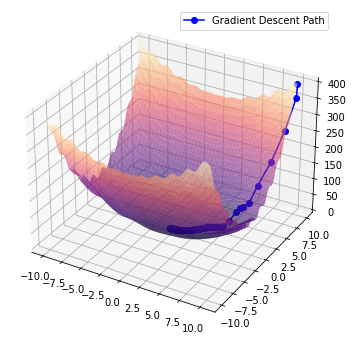

(array([-4.99999996e-01,  3.26380369e-29]), -0.24999999999999997, 354)

In [7]:
# Redefining the function f for the new given function
def f(point):
    x, y = point
    return x**2 + x*np.cos(x*y/3) + 3*y**2

# Redefining the function g which calculates the gradient of the new f
def g(point):
    x, y = point
    # Calculating the partial derivatives of the function f with respect to x and y
    df_dx = 2*x + np.cos(x*y/3) - (x*y/3)*np.sin(x*y/3)
    df_dy = x*(-(x/3)*np.sin(x*y/3)) + 6*y
    return np.array([df_dx, df_dy]) # returning the gradient array containing the partial derivatives [df_dx, df_dy]

# Parameters given in the assignment
xstart = [10, 10]   # Starting coordinates for the gradient descent
lambda_ = 0.03          # Step size
tolerance = 1e-8       # Tolerance for stopping criterion
maxiterations = 5000     # Maximum number of iterations

# Run gradient descent
# Run gradient descent with the new functions and parameters
# Call the gradient descent function with the new f and g
xoptimal, foptimal, niterations = gradient_descent(f, g, xstart, lambda_, tolerance, maxiterations)
xoptimal, foptimal, niterations

### Part 2-2 
calculating lambda values

In [4]:
# finding the smallest value & largest value of lambda that it converges
# adding values to the list to test 
lambda_values = [0.001, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017, 0.0018, 0.0019, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.2, 0.3, 0.31, 0.32, 0.33, 0.331, 0.332]  # Example range of lambda values
# creating a dictionary to store the results of each test
convergence_results = {}

for lambda_test in lambda_values: # iterating each lambda value in "lambda_values" list 
    # doplot=False because I only want to see results not graph
    # lambda_test: current value of lambda in lambda_values list
    xoptimal, foptimal, niterations = gradient_descent(f, g, xstart, lambda_test, tolerance, maxiterations, doplot=False)
    # If niterations < maxiterations = true; algorithm converged before reaching maxiterations and step size was suitable for the algorithm to function well.
    # If niterations < maxiterations = false; within the allowed number of iterations, converge did not happen [it may show step size too large or too small]
    converged = niterations < maxiterations  # Convergence criteria 
    # convergence = approaching the minimum of a function
    # storing convergence status(true-false) in dictionary with lambda_test values as key
    convergence_results[lambda_test] = converged

# printing findings
print(convergence_results) 

{0.001: False, 0.0012: False, 0.0013: False, 0.0014: False, 0.0015: False, 0.0016: False, 0.0017: False, 0.0018: False, 0.0019: False, 0.002: False, 0.003: True, 0.004: True, 0.005: True, 0.01: True, 0.02: True, 0.03: True, 0.04: True, 0.05: True, 0.1: True, 0.11: True, 0.12: True, 0.13: True, 0.14: True, 0.15: True, 0.2: True, 0.3: True, 0.31: True, 0.32: True, 0.33: True, 0.331: True, 0.332: False}


smallest lambda that won't converge: 0.002

**then it starts converging at 0.003**

largest value of lambda for which this converge: 0.332

## Part 3
solving the problem

> terms that help me to understand the assignment:

all in degress: 
* theta1: Angle of the first joint
* theta2: Angle of the second joint [relative to the first joint which guides the movement of the second joint] - end effector attached to second joint
* l1: Length of first arm [which is connected to base]
* l2: Length of second arm 

**end effector:** 

robotic arm's goal = move its end effector to a designed spot in space
we must first determine its starting point in order to map the end effector's route to target

1- Every joint has an arm which can rotate around its joint
2- Each arm has a specific length (l1,l2)
3- Angles of these joints (theta1,theta2) determine = location of the end effector

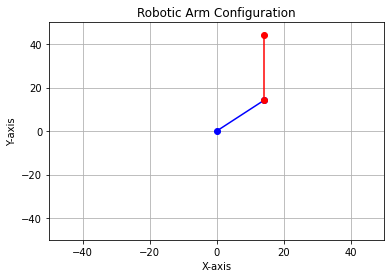

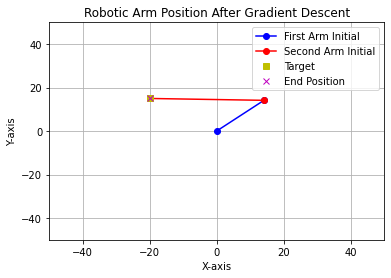

In [5]:
# Defining "end_effector_position_deg": calculating position of the end effector of two-joined arm [in two-dimensional plane]
def end_effector_position_deg(theta1, theta2, l1, l2):
    # np.deg2rad to change degrees to radians as "trigonometric functions in NumPy" require radians
    # calculating position of end effector based on the joint angles theta1-2 and the lengths of the arms l1-l2 and base of the first arm (0,0)
    x = l1 * np.cos(np.deg2rad(theta1)) + l2 * np.cos(np.deg2rad(theta1 + theta2)) # calculating x coordinate of end effector
    # l1 * np.cos(np.deg2rad(theta1)): calculating "horizontal component" of first arm's position
    # l2 * np.cos(np.deg2rad(theta1 + theta2): "horizontal component" of second arm's position in relation to first 
    y = l1 * np.sin(np.deg2rad(theta1)) + l2 * np.sin(np.deg2rad(theta1 + theta2)) # calculating x coordinate of end effector
    # l1 * np.sin(np.deg2rad(theta1)): calculating "vertical component" of first arm's position
    # l2 * np.sin(np.deg2rad(theta1 + theta2): "vertical component" of second arm's position in relation to first 
    return x, y
    # x coordinate = total horizontal distance from base joint [0,0] [y same for vertical]

# defining objective function f_deg with five parameters and computing squared distance to target point
# theta as list containing two elements [packing 2 elements, it is mostly prefferred in coding because: can easily passed to optimization functions]
def f_deg(theta, l1, l2, c1, c2):
    # calling previously defined function "end_effector_position_deg" and returning x and y values
    x, y = end_effector_position_deg(theta[0], theta[1], l1, l2)
    return (x - c1) ** 2 + (y - c2) ** 2 # computing squared difference in x-direction and y-direction between the end effector and the target

# Calculating gradient function g_deg for the objective function f_deg (in degrees)
def g_deg(theta, l1, l2, c1, c2):
    theta1, theta2 = theta  # Unpack theta [just like point]
    
    #function => f(x) = (x-a)^2  then derivative=> f'(x)=2(x-a)
    # calculating partial derivative of f_deg in relation to theta1 = calculating change in objective function as theta1 changes [keeping theta2 fixed] 
    grad_theta1 = 2 * ((l1 * np.sin(np.deg2rad(theta1)) + l2 * np.sin(np.deg2rad(theta1+theta2))) * (l1 * np.cos(np.deg2rad(theta1)) + l2 * np.cos(np.deg2rad(theta1 + theta2)) - c1) * (-1) +
                        (l1 * np.cos(np.deg2rad(theta1)) + l2 * np.cos(np.deg2rad(theta1+theta2))) * (l1 * np.sin(np.deg2rad(theta1)) + l2 * np.sin(np.deg2rad(theta1 + theta2)) - c2))
    
    # calculating partial derivative of f_deg in relation to theta2 = calculating change in objective function as theta2 changes [keeping theta1 fixed]
    grad_theta2 = 2 * l2 * ( -1 * (np.sin(np.deg2rad(theta1 + theta2)) * (l1 * np.cos(np.deg2rad(theta1)) + l2 * np.cos(np.deg2rad(theta1 + theta2)) - c1)) +
                             np.cos(np.deg2rad(theta1 + theta2)) * (l1 * np.sin(np.deg2rad(theta1)) + l2 * np.sin(np.deg2rad(theta1 + theta2)) - c2))
    
    return np.array([grad_theta1, grad_theta2])

# Defining given values for the problem
theta1, theta2 = 45, 45  # Initial joint angles in degrees
l1, l2 = 20, 30  # Lengths of the arm segments

# drawing the configution of the arms into a plot
# calculating position of first joint 
x1, y1 = l1 * np.cos(np.deg2rad(theta1)), l1 * np.sin(np.deg2rad(theta1)) # x component, y component
# calculating position of end effector
# calculating second joint is not necessary, we are interested in position of end effector
x2, y2 = end_effector_position_deg(theta1, theta2, l1, l2)
# plotting first arm
plt.plot([0, x1], [0, y1], 'bo-') # [0, x1] : starts at the base [x-coordinate 0] and extends to x1 [same for y coordinate]
# plotting second arm
# [x1, x2], [y1, y2] = x and y coordinates of start and endpoints of second arm
plt.plot([x1, x2], [y1, y2], 'ro-') 
# ro- : solid (-), red (r) circular (o) marker
# matplotlib.pyplot.xlim(*args, **kwargs) = Get or set the x limits of the current axes
plt.xlim(-50, 50)
plt.ylim(-50, 50)
# labeling x and y axis
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Robotic Arm Configuration')
plt.grid(True)
plt.show()

# Setting target coordinates for the end effector
c1, c2 = 15, 15  
# Selecting a target point
target_c1, target_c2 = -20, 15  

# Running gradient descent [to find the optimal joint angles]
result = gradient_descent(f_deg, g_deg, xstart, lambda_, tolerance, maxiterations, False, l1, l2, target_c1, target_c2)

# first element of the result = array of optimal angles
# converting it to NumPy array
theta_optimal = np.array(result[0])

# Checking and changing the shape of the theta_optimal
# ensuring that theta_optimal = one-dimensional array of values
if theta_optimal.ndim > 1: # ndarray.ndim = Number of array dimensions
    theta_optimal = theta_optimal.flatten() # ndarray.flatten(order='C') = Return a copy of the array collapsed into one dimension

# Calculating the optimal end-effector position
optimal_end_x, optimal_end_y = end_effector_position_deg(theta_optimal[0], theta_optimal[1], l1, l2)

# Ploting the target point and the end position after gradient descent
plt.figure()  # to avoid overlap
# plotting first arm / same with above
plt.plot([0, x1], [0, y1], 'bo-', label='First Arm Initial')  
# plotting second arm / same with above
plt.plot([x1, optimal_end_x], [y1, optimal_end_y], 'ro-', label='Second Arm Initial')  
plt.plot(target_c1, target_c2, 'ys', label='Target')  #  x - y coordinates of the target position 
# go= green and o marker
plt.plot(optimal_end_x, optimal_end_y, 'mx', label='End Position')  # plotting end position of the end effector
# bx= blue and x marker
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Robotic Arm Position After Gradient Descent')
plt.grid(True)
plt.legend()
plt.show()

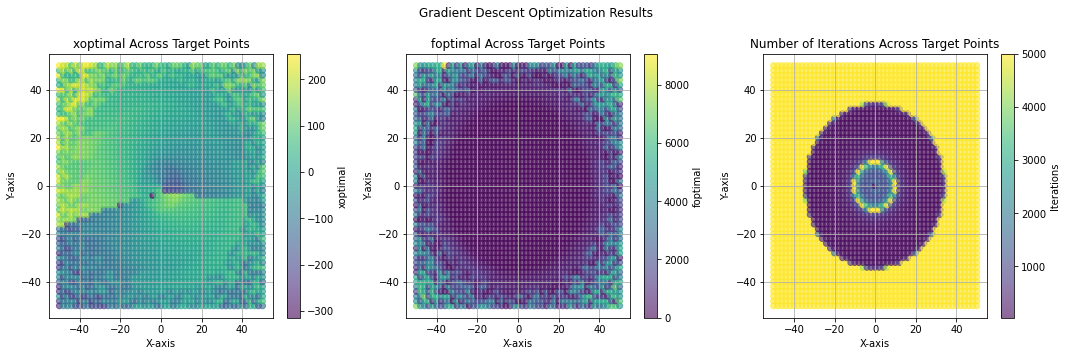

In [6]:
# Defining the range of points for the grid - starts at -50, ends at 52 (to include 50), and increments by 2 as indicated in assingment
x_range = np.arange(-50, 52, 2)  # 52: ensuring the upper bound 50 included in the grid [because of step size of 2]
y_range = np.arange(-50, 52, 2)

# Creating a list to store the outputs 
results = []

# iterating over each combinations of "x_target and y_target" within "x_range and y_range"
# performing gradient descent optimization for every potential set of "x_target and y_target"
for x_target in x_range:
    for y_target in y_range:
        # Run gradient descent for the current target point
        result = gradient_descent(f_deg, g_deg, xstart, lambda_, tolerance, maxiterations, False, l1, l2, x_target, y_target)
        # appending results in list
        # I defined xoptimal, foptimal, niterations = gradient_descent(f, g, ..) so result[0]: xoptimal ext...
        results.append({
            'target': (x_target, y_target), # current target point in x-y plane [tuple]
            'optimal_angles': result[0], # showing xoptimal is - first element in each "result"
            # optimal joint angles found by gradient descent: optimal_angles
            'function_value': result[1], # function value: value of objective function at optimal angles
            # number of iterations
            'n_iterations': result[2]
        })

# Preparing arrays to hold the data for plotting
# x and y coordinates of each target point
target_x_values = [] 
target_y_values = []
xoptimal_values = [] # optimal angle for theta1
yoptimal_values = [] # optimal angle for theta2
foptimal_values = [] # value of the objective function at the optimal point
niterations_values = [] 

# extracting relevant data and appending it to these lists
for result in results:
    target_x_values.append(result['target'][0]) #  x coordinates of target point
    target_y_values.append(result['target'][1]) #  y coordinates of target point
    xoptimal_values.append(result['optimal_angles'][0])  # optimal angle for theta1
    yoptimal_values.append(result['optimal_angles'][1])  # optimal angle for theta2
    foptimal_values.append(result['function_value']) 
    niterations_values.append(result['n_iterations'])

# Preparing the figure
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row - 3 columns
fig.suptitle('Gradient Descent Optimization Results')

# defining function to plot each subplot
def setup_subplot(ax, x_values, y_values, z_values, title, z_label): 
    # ax: axes for subplot, c=z_values: values of the data points determining their color in plot
    scatter = ax.scatter(x_values, y_values, c=z_values, cmap='viridis', alpha=0.6) # alpha= opacitiy of plot
    fig.colorbar(scatter, ax=ax, label=z_label) # adding color bar
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title(title)
    ax.grid(True)

# plotting subplot for xoptimal
setup_subplot(axs[0], target_x_values, target_y_values, xoptimal_values, 'xoptimal Across Target Points', 'xoptimal')

# plotting subplot for foptimal
setup_subplot(axs[1], target_x_values, target_y_values, foptimal_values, 'foptimal Across Target Points', 'foptimal')

# plotting subplot for number of iterations
setup_subplot(axs[2], target_x_values, target_y_values, niterations_values, 'Number of Iterations Across Target Points', 'Iterations')


plt.tight_layout() # adjusting layout to prevent overlap
plt.subplots_adjust(top=0.85)  # adjusting the top [its for title]

# Showing the figure 
plt.show()


> Discuss the outputs - what can you say, for example, for the starting points that the arm cannot reach? How did the gradient_descent optimize then? Does this make “sense”?

In this optimization problem, I attempted to determine the "joint angles that minimize the distance between the character position and the user-specified position". The robotic arm consists of two arm lengths (l1-l2) and joints (theta 1, theta 2), and it can move in both the horizontal and vertical planes thanks to those joints.
If there are starting points that arm cannot reach it may be because of the gradient descent algorithm that I wrote at the beginning of the assignment (which was also the case for me). It means: maybe algorithm might not be able to find the proper joint angles needed to converge to a solution. It may be due to many things such as: initialization of the angles in code, learning rate chosen, gradient's accuracy, ext.
However, by its nature robot arm has physical restrictions. If the target point is outside of l1+l2, the arm cannot reach it. But still, algorithm modifies the angles of the arm's joints to look for positions that the arm can physically reach. Gradient descent will approximate as closely as possible to targets beyond the arm's physical reach. As a result, the arm will come as close as possible to the target but not exactly. But still, it is quite interesting that despite it can identify optimal solution, cannot indicate if the arm can actually reach the target. 
And yes, it makes sense because the gradient descent algorithm still seeks to optimize the objective function and finds the best solution despite of the system's constraints—in our case, physical limitations—and unreachable target points.
